Student name: Elsa Anza Martín

Student id: 21272808

# Deep neural networks

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Get the data and manipulate

We're going to use the digits dataset, which is already available in sklearn.

From sklearn documentation: This dataset is made up of 1797 8x8 images. Each image is of a hand-written digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64.


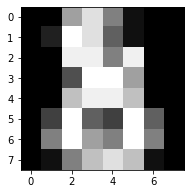

In [2]:
# given

from sklearn.datasets import load_digits
digits = load_digits(return_X_y=False)

#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray, interpolation='nearest')
plt.show()

X = digits.data        # The flattened, vector version of the images
y = digits.target

### Data manipulation

Firstly, do a train/test split. Keep 20% of the data for test. Fix the `random_state` so that the test is completely repeatible.

Then use the `StandardScaler` function from `sklearn.preprocessing`, as the multi-layer perceptron can be quite sensitive to data scaling.

In [3]:
# Your code here

#split train and test values
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size= 0.2, stratify=y, random_state=42)

## Task 1: Train a Perceptron

1. A single artifical neuron is a Perceptron, so use `sklearn`'s implementation of the Percpetron, and train it.
2. Calculate and print the accuracy
3. Discuss the result, does it seem good or bad?
4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the digit that was predicted?)
5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

In [73]:
# Your code here
from sklearn.linear_model import Perceptron
clf = Perceptron(random_state=0)
clf.fit(X_train, y_train)
Perceptron()
y_pred = clf.predict(X_test)


In [74]:
# Your code here
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9361111111111111

### 3. Is it a good accuracy?

For general image classification, humans perform close to 100%. For the given MNST dataset, I've found sources claiming human accuracy to be around 98%. Overall, I'd say an accuracy of 98–99% in a trained network is fairly easy to obtain, so, although high, our achieved accuracy of 0.93 is not anywhere close to impressive.

### 4. Example of an incorrect classification

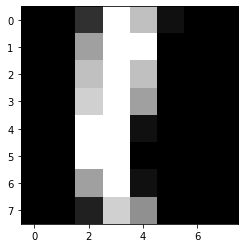


predicted class was 6 whereas ground truth was 1


In [72]:
for i in range(len(y_pred)):
  if y_pred[i] != y_test[i]:
    match = i
    break
plt.gray()
plt.imshow(np.resize(X_test[i],(8,8)))
plt.show()
print("\npredicted class was", y_pred[i],"whereas ground truth was",  y_test[i])

#### Missclasification discussion
There's certain numbers that are bound to be more easily classified than others. Some numbers might look similar like 7 and 1 which might lead to a missclassification when theres ambiguity.

 In this case, a 1 was missclassified as a 6. The slight curvature in the end might be the reason behind this.

The accuracy is not too bad (you should achieve about 95% if you've done it right). Not bad at all for a simple linear classifier. However, as with all of these types of problems, most of the effort will go into gaining small, but important imporvements. Let's see if we can get closer to 99%.

## Task 2: Train a multi-layer Perceptron with one hidden layer (of width 20)

Let's try going wide first

* Set the regularizing parameter to 0.1 (alpha = 0.1). We have looked at regularisation before in the context of machine learning algorithms. It is important, but we won't investigate it further here. We'll leave this fixed.
* Set verbose = 1, so we can look at what is happenign on each epoch (iteration)
* Set random_state=1 (or some constant), so the test is repeatible
* For the moment, set hidden_layer_sizes to (20,). 

This tuple then sets the number of hidden layers. The number of values in the tuple is the number of layers, and the number of each value is the number of nodes in that layer. So a tuple of (50,30,10) would be one layer with 50 nodes, connect to a second hidden layer with 30 nodes and a final hidden layer with 10 nodes). But for the moment, just go for one hidden layer with 20 nodes.

Also print the __training and accuracy score__ of our current network (remember the `accuracy_score` function from `sklearn.metrics`?). The score on the test dataset should not be too bad at this point (something like 97% hopefully?). That's quite impressive for a first stab at a neural network. Let's see if we can do better, though!

In [9]:
# Your code here
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=300, alpha=0.1, verbose=1, hidden_layer_sizes=(20)).fit(X_train, y_train)
y_pred_mlp = clf.predict(X_test)
#clf.score(X_test, y_test)

Iteration 1, loss = 10.07906786
Iteration 2, loss = 7.04463931
Iteration 3, loss = 5.37431132
Iteration 4, loss = 4.33088491
Iteration 5, loss = 3.50217443
Iteration 6, loss = 2.89609759
Iteration 7, loss = 2.46136768
Iteration 8, loss = 2.14213819
Iteration 9, loss = 1.86800803
Iteration 10, loss = 1.64880896
Iteration 11, loss = 1.46948075
Iteration 12, loss = 1.31852205
Iteration 13, loss = 1.19102807
Iteration 14, loss = 1.08176646
Iteration 15, loss = 0.99518313
Iteration 16, loss = 0.91897058
Iteration 17, loss = 0.85240215
Iteration 18, loss = 0.79185737
Iteration 19, loss = 0.74297117
Iteration 20, loss = 0.69808374
Iteration 21, loss = 0.66012157
Iteration 22, loss = 0.62504296
Iteration 23, loss = 0.59339146
Iteration 24, loss = 0.56458669
Iteration 25, loss = 0.54102747
Iteration 26, loss = 0.51847370
Iteration 27, loss = 0.49484843
Iteration 28, loss = 0.47423460
Iteration 29, loss = 0.45648919
Iteration 30, loss = 0.43897929
Iteration 31, loss = 0.42180009
Iteration 32, lo

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.9694444444444444

In [77]:
#training accuracy 
y_pred_train = clf.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.9707724425887265

In [10]:
# Test accuracy
accuracy_score(y_test, y_pred_mlp)

0.9694444444444444

#### Questions: (answer here)

1. What is the size of the input layer here? Explain
2. What is the size of the output layer here? Explain
3. How many weights in total does the algorithm learn?
4. What does it mean that the training accuracy and the test accuracy are different?

<font color='red'>

1. Input layer is the feature vector of length 64, so the size of the input is 64. Each of those pixels goes into the hidden layer, which in this case has 20 features in 1 hidden layer.

2. output layer is the predicted class which is one of the numbers 0-9, so size of the output is 1.

3. weights in the only hidden layer are 64x20= 1280.

4. training and test accuracies are different because they're measured on different sets of data. Improving training accuracy can lead to a loss in testing accuracy and this is called overfitting, which means the model is not able to generalize enough. Test accuracy is the real value we're meant to improve since is the real perfomance that the model has on unseen data so its an actual measure of perfomance in a situation close to reality. Test accuracy is lower than training because the model is optimized for the data it was trained on. This does not mean the model is doing a poor job at classifying, as it is expected to be harder to classify unseen examples.


</font>

#### Visualise

In the above test, we're going to leave the default number of epochs/iterations at 200. We should see that, with a single layer with only 20 neurons, that we hit this limit before we get convergence, and a warning should be thrown that the maximum number of iterations has been reached. We could increase the number of iterations, in the hopes that we converge at a low loss. But let's instead play with the design of our network.

But first, let's show some of the test samples, and the predicted labels.

**Hint:** Each sample in `X_test` will be a 64-vector. To render as an 8x8 image, we have to convert to an 8x8 matrix. You can use `*.reshape(8, 8)` for this (assuming numpy vectors).

### Examples of predicted classes with visualisation

Predicted class is 2


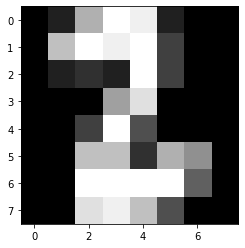

In [80]:
# Your visualisation code here
plt.imshow(np.resize(X_test[5],(8,8)))
print("Predicted class is", y_pred_mlp[5])

Predicted class is 1


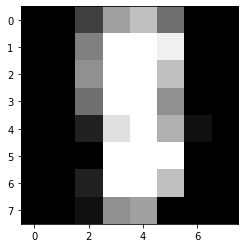

In [81]:
k= 40
plt.imshow(np.resize(X_test[k],(8,8)))
print("Predicted class is", y_pred_mlp[k])

Predicted class is 6


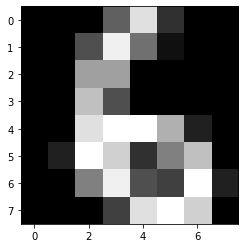

In [82]:
k=100
plt.imshow(np.resize(X_test[k],(8,8)))
print("Predicted class is", y_pred_mlp[k])

#### Wider, wider, wider

Let's go wider. We have quite a lot of input features, and somehow it might seem that if we immediately connect this to a layer with only 20 neurons that something might be lost?

Well, this makes some sense. However, we have seen that we get pretty good test accuracy already! So what does this mean? The hidden layer is encoding a set of 20 features that we then use to describe the digits in the output layer. This means that 95% of the handwritten digits can be correctly classified using these 20 features.

Let's see if more features help!

Iterate over a wider number of neurons, and plot the train accuracy and test accuracy as a graph. For example, iterate over a set of widths of `(20, 50, 100, 500, 1000, 2000, 4000)`, or something similar.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

In [87]:
# Your classifier training code here
widths = (20, 50, 100, 500, 1000, 2000, 4000)

from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import time

test_accuracy = []
train_accuracy=[]
training_time= []

for i in widths:
  start = time.perf_counter()
  clf = MLPClassifier(random_state=1, max_iter=300, alpha=0.1, verbose=0, hidden_layer_sizes=(i)).fit(X_train, y_train)
  y_pred_mlp = clf.predict(X_test)
  end = time.perf_counter()
  y_train_pred_mlp = clf.predict(X_train)
#  train_accuracy.append(clf.score(X_train, y_train_pred_mlp))  
#  test_accuracy.append(clf.score(X_test, y_pred_mlp))
  training_time.append(end-start)
  train_accuracy.append(accuracy_score(y_test, y_pred_mlp))
  test_accuracy.append(accuracy_score(y_train, y_train_pred_mlp))

print (test_accuracy)
print (train_accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[0.9777777777777777, 0.9861111111111112, 0.9833333333333333, 0.9777777777777777, 0.9777777777777777]


In [93]:
train_accuracy

[0.9694444444444444,
 0.9694444444444444,
 0.9777777777777777,
 0.9833333333333333,
 0.9833333333333333,
 0.9861111111111112,
 0.9861111111111112]

In [94]:
test_accuracy

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

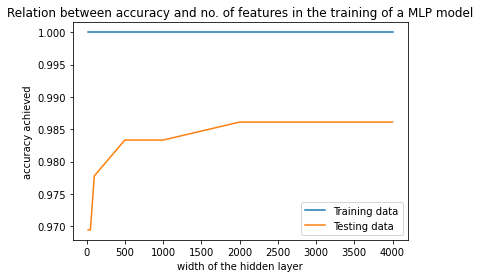

In [92]:
# Your plot of training and test accuracy here
import matplotlib.pyplot as plt

plt.plot(widths, test_accuracy)
plt.plot(widths, train_accuracy)
plt.xlabel("width of the hidden layer")
plt.ylabel("accuracy achieved")
plt.legend(['Training data', 'Testing data'])
plt.title("Relation between accuracy and no. of features in the training of a MLP model")
plt.show()

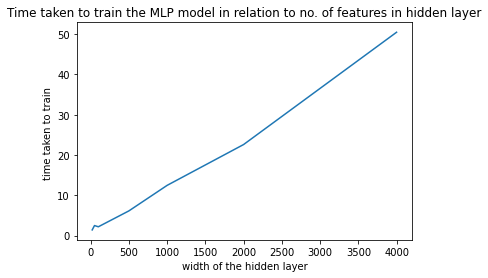

In [20]:
plt.plot(widths, training_time)
plt.xlabel("width of the hidden layer")
plt.ylabel("time taken to train")
plt.title("Time taken to train the MLP model in relation to no. of features in hidden layer")
plt.show()

Questions:

1. When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.

2. What can you infer from the graph?

For the second question, think about the following:
* For the number of neurons you have tested, what is the best? (Highest performance -vs- lowest number of neurons)
* How many weights are learned by the algorithm for our optimal solution?
* Is there any evidence of overfitting occuring? Discuss this. What could we do to reduce this, if it is evident? (No need to implement anything to address tyhe overfitting, just comment)
(Hint: a large divergence between training accuracy and testing accuracy can indicate over-fitting).

<font color='red'>

1. In previous plot I've shown how long it's taken to train every model. In that graph it can be seen how the more complex the network gets the higher it takes to train it.
2. The main take from the accuracy graph with different widths is that complexity does not mean better perfomance. At first, more complex networks (more width) does translate into a better classifier (higher accuracy) but this is not a linear relation. At around 500 neurons the model stops improving accuracy as quickly and after 2000 there's no clear impovement in the classifier.
The optimal solution can be considered 2000, for which the classifier has a number of weights equal to 64x2000 =128000 weights.
The model performs perfectly on the training data, which is a sign of ovetfitting and means the model is not able to generalize enough in unseen data. Addressing overfitting in these models primarily involves using regularization techniques. 

</font>


## Task 3: The deeper the better!

Previously, we only had a single hidden layer, and we went as wide as a 1000 neurons. That is a lot of neurons and a lot of computation. Can we do better with fewer neurons by going deeper and using more layers? Now we're going to start playing with different configurations.

Rerun the above loop, but let's use a set of deeper networks. These are going to be simply designed. I suggest to use something like:
`layers = ((50,50),(50,50,50),(50,100),(100,100,50),(100,100,100))`

Plot the train and test accuracy as a graph.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

**Note**: you might be feeling at this point that picking the neural network architecture is kind of random. At the moment, it is, to be honest. How many neurons per layer should I use? How many layers? And then I have to pick the training parameters on top of this?? These are all called hyperparameters of the network, and there is a lot of skill to develop to develop to be able to design networks efficiently and pick the right training parameters.

In [95]:
# Your classifier training code here
accuracy = []
train_accuracy = []
training_time= []
hidden_layers=((50,50),(50,50,50),(50,100),(100,100,50),(100,100,100))
for i in hidden_layers:
  start = time.perf_counter()
  clf = MLPClassifier(random_state=1, max_iter=300, alpha=0.1, verbose=0, hidden_layer_sizes=i).fit(X_train, y_train)
  y_pred_mlp = clf.predict(X_test)
  end = time.perf_counter()
  accuracy.append(clf.score(X_train, y_train))
  train_accuracy.append(accuracy_score(y_test, y_pred_mlp))
  training_time.append(end-start)

print (accuracy)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


[1.0, 1.0, 1.0, 1.0, 1.0]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [106]:
train_accuracy

[0.9777777777777777,
 0.9861111111111112,
 0.9833333333333333,
 0.9777777777777777,
 0.9777777777777777]

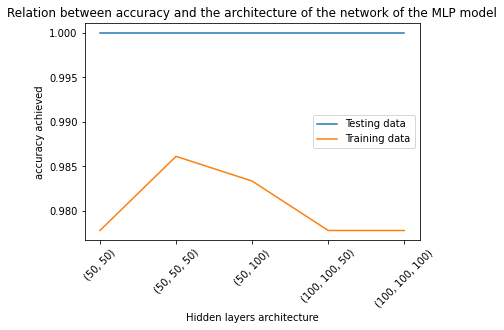

In [104]:
# Your visualisation code here
x=list(range(len(accuracy)))
plt.plot(x, accuracy)
plt.plot(x, train_accuracy)
plt.xlabel("Hidden layers architecture")
plt.ylabel("accuracy achieved")
plt.title("Relation between accuracy and the architecture of the network of the MLP model")
plt.legend(['Testing data', 'Training data'])
plt.xticks(x, labels=hidden_layers, rotation = 45)
plt.show()

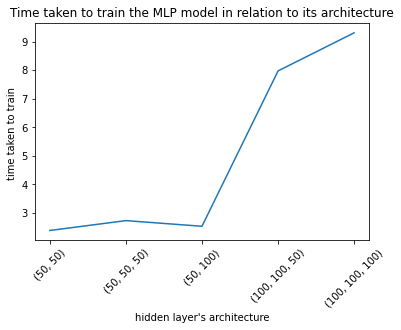

In [105]:
plt.plot(x, training_time)
plt.xlabel("hidden layer's architecture")
plt.ylabel("time taken to train ")
plt.xticks(x, labels=hidden_layers, rotation = 45)
plt.title("Time taken to train the MLP model in relation to its architecture")
plt.show()

#### Questions

What can you infer from the graph? (answer in the text box here).

Think about the following:
* Do I have a deeper network that has fewer neurons but is doing better than my very wide network?
* How many weights did I need to train?

<font color='red'>

1. The graph shows that fewer neurons can perform better than deeper single-layer networks as the ones traiend in the previous example. The best-performing architeture is a 3 hidden-layer model of 50x50x50. This model achieves an accuracy of 0.9861111111111112 with a number of weights equal to 64x50+50x50+50x50 = 3200+2500+2500=8200 weights in total, which is less than the number of weights used in other models that don't perform as well.

This means the perfomance of the network has more to do with the architecture itself than with the amount of heights, deepness of the network of the number of layers. In other words, deeper or more complex networks are not unquestionably better. (No free lunch).


</font>



## Task 4: Confusion matrix

A [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) is a powerful way to visualise errors in your trained network. Plot a confusion matrix for your best model above (of course, plot using the test data).

Describe what you see in the confusion matrix.

In [65]:
clf = MLPClassifier(random_state=1, max_iter=300, alpha=0.1, verbose=0, hidden_layer_sizes=(50,50,50)).fit(X_train, y_train)
y_pred_mlp = clf.predict(X_test)

In [68]:
# Your code here
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

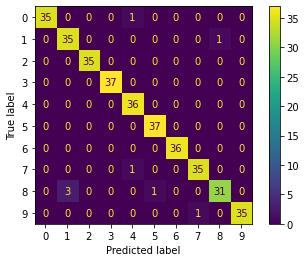

Confusion matrix for the best perfoming network (50x50x50)


In [113]:
cm = confusion_matrix(y_test, y_pred_mlp, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()
print("Confusion matrix for the best perfoming network (50x50x50)")
#plt.title("Confusion matrix for the best perfoming network (50x50x50)")

<font color='red'>
It is shown how some number are more easily classified than others.
3 and 5 have higher accuracy rates whereas number 8 accounts for the easiest to missclasify class. 
This usually means that a class is more likely to be mistaken for another class due to ambiguity in its depction, in this case in its hand-written shape. 

</font>

# Some final comments

What we have really done here is a manual hyper-parameter search for an optimal neural network for handwritten digit classification. We have only touched the network architecture, but as we know from before, playing with things like learning rates, regularisation parameters, and other hyper-parameters, can lead to improved performance as well. There are also [automated hyper-parameter search mechanisms](https://scikit-learn.org/stable/modules/grid_search.html). These include thinks like grid search and randomised parameter searching. We won't touch on these during this module, but it is good for you to understand that these exist.

When I started hearing lots about neural networks in the early to mid 2010s, I thought it was some kind of magic. At that stage, I had never really worked in machine learning. I had done a small bit of the traditional ML for computer vision (such as [HOG+SVM](https://medium.com/@mithi/vehicles-tracking-with-hog-and-linear-svm-c9f27eaf521a) in computer vision), but I'm comfortable in saying that I never really understood it. Deep neural networks were these amazing new things that were blowing everything else out of the water, and I think I assumed that they were these were new and ultra-complex algorithms that were difficult to understand. I hope that you realise what I learned after a while: firstly, neural networks aren't new at all, and secondly, if you know and understand linear classification models, such as the percepton, then deep neural networks are easily understood (particularly if you understand the chain rule and backprop as well).

-- Ciarán